In [1]:
from sampstrats import GaussianPRM
from sampstrats import BasicGaussianPRM
import random
import math
import copy
import heapq
import numpy as np
import networkx as nx
import IPPRMBase
import matplotlib.pyplot as plt
from IPPerfMonitor import IPPerfMonitor
import IPTestSuite

In [2]:
def basicPRMVisualize(graph, collChecker, solution, nodeSize=300.0, ax=None):
    # get a list of posiations of all nodes by returning the content of the attribute 'pos'
    pos = nx.get_node_attributes(graph,'pos')
    
    # draw graph (nodes colorized by degree)
    nx.draw_networkx_nodes(graph, pos,  cmap=plt.cm.Blues, ax = ax, node_size=nodeSize)
    nx.draw_networkx_edges(graph,pos,
                                ax = ax
                                )
    
   
    

    collChecker.drawObstacles(ax)
    
    
    # draw nodes based on solution path
    Gsp = nx.subgraph(graph,solution)
    nx.draw_networkx_nodes(Gsp,pos,
                            node_size=300,
                             node_color='g',  ax = ax)
        
    # draw edges based on solution path
    nx.draw_networkx_edges(Gsp,pos,alpha=0.8,edge_color='g',width=10,  ax = ax)
        
    # draw start and goal
    if "start" in graph.nodes(): 
        nx.draw_networkx_nodes(graph,pos,nodelist=["start"],
                                   node_size=300,
                                   node_color='#00dd00',  ax = ax)
    if "goal" in graph.nodes():
        nx.draw_networkx_nodes(graph,pos,nodelist=["goal"],
                                   node_size=300,
                                   node_color='#DD0000', ax = ax)

Planning:  Entrances
Failed No path between start and goal.
Planning:  KIT
['start', 369, 331, 362, 303, 46, 2, 114, 14, 11, 19, 20, 76, 21, 213, 16, 6, 315, 321, 393, 'goal'] 21
401
Planning:  Inside
['start', 287, 32, 70, 15, 164, 8, 74, 14, 25, 391, 12, 80, 51, 30, 13, 17, 110, 22, 21, 313, 7, 386, 23, 84, 'goal'] 26
401
Planning:  SSL
['start', 379, 88, 53, 31, 18, 105, 2, 3, 276, 12, 24, 5, 263, 9, 14, 17, 152, 8, 28, 181, 11, 20, 356, 'goal'] 25
401
Planning:  Ring
['start', 344, 1, 127, 47, 7, 15, 64, 17, 22, 284, 2, 399, 41, 6, 182, 52, 250, 'goal'] 19
401
Planning:  Hemispheres
Failed No path between start and goal.
Planning:  Hammerhead
['start', 263, 11, 227, 8, 14, 132, 7, 1, 23, 67, 17, 2, 3, 147, 12, 290, 5, 4, 301, 9, 188, 26, 77, 10, 168, 'goal'] 27
401
Planning:  Zigzag
['start', 211, 1, 198, 28, 8, 2, 23, 293, 20, 11, 291, 41, 30, 15, 29, 324, 32, 35, 59, 396, 21, 50, 342, 52, 392, 17, 'goal'] 28
401
Planning:  Spiral
['start', 25, 46, 74, 355, 17, 137, 212, 342, 78, 

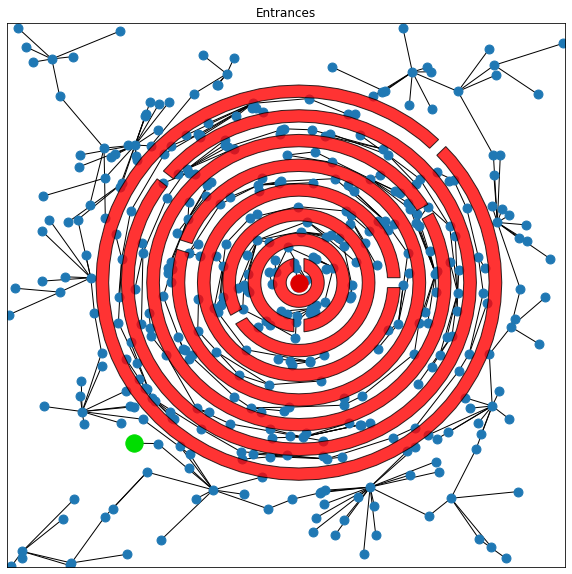

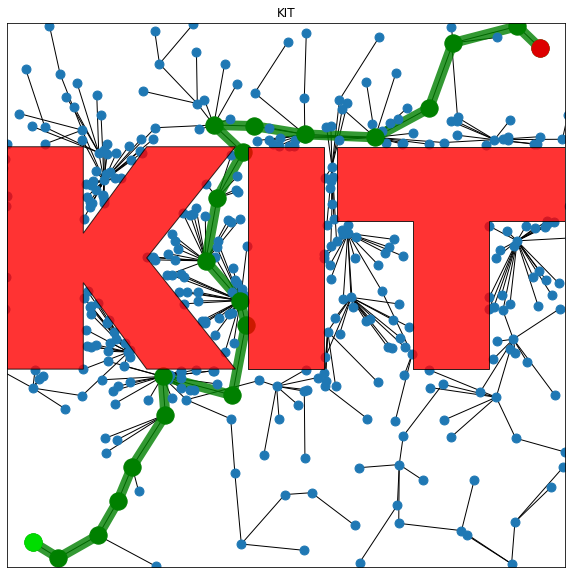

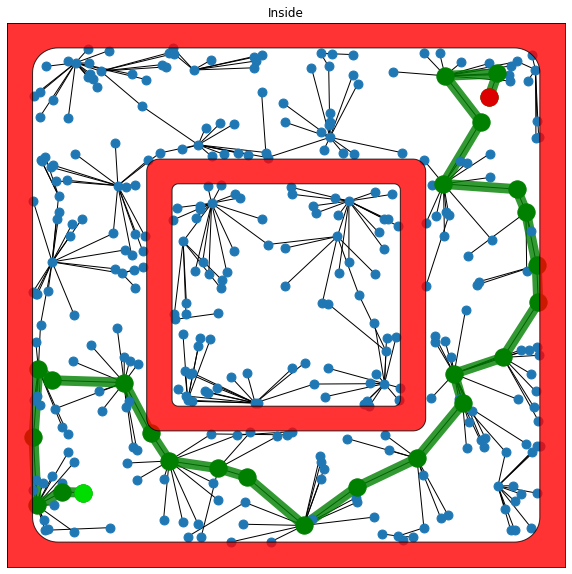

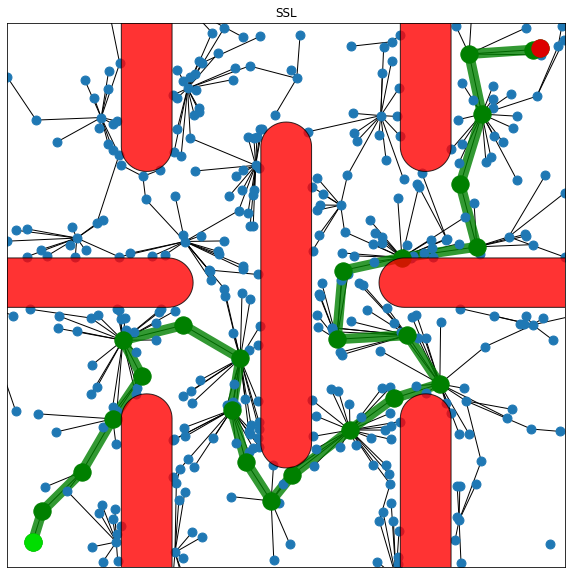

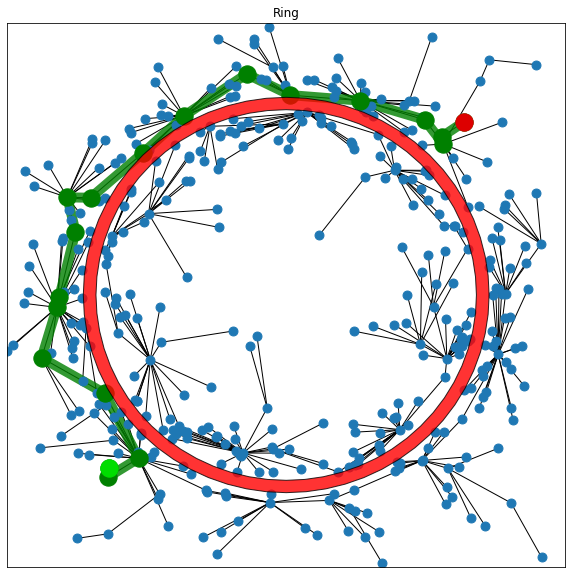

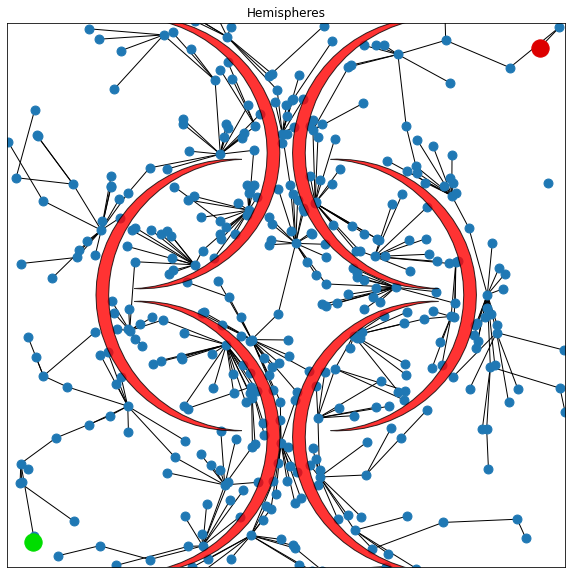

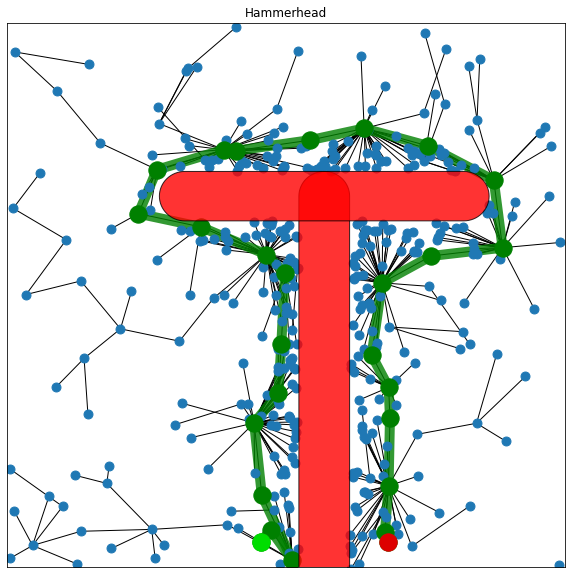

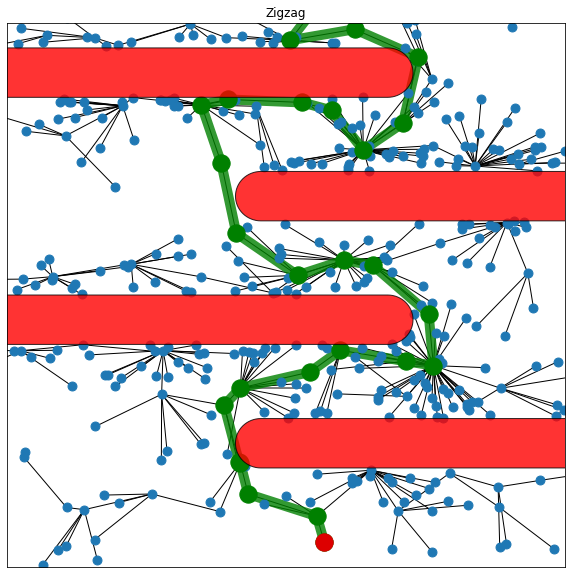

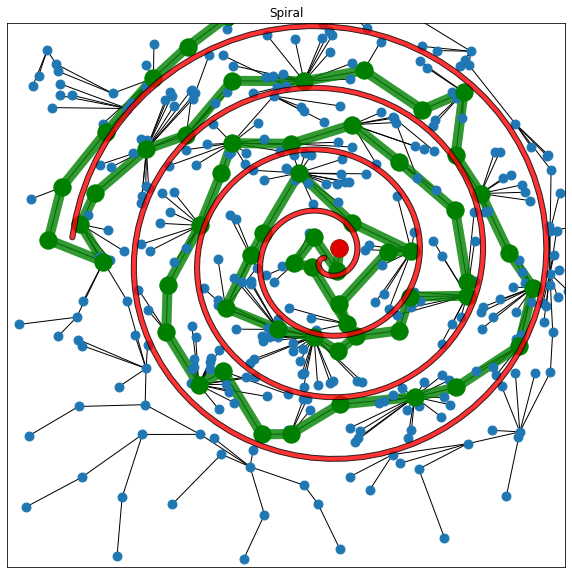

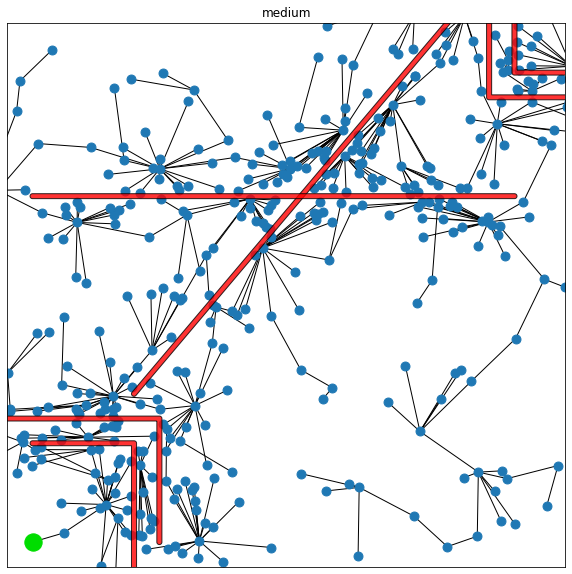

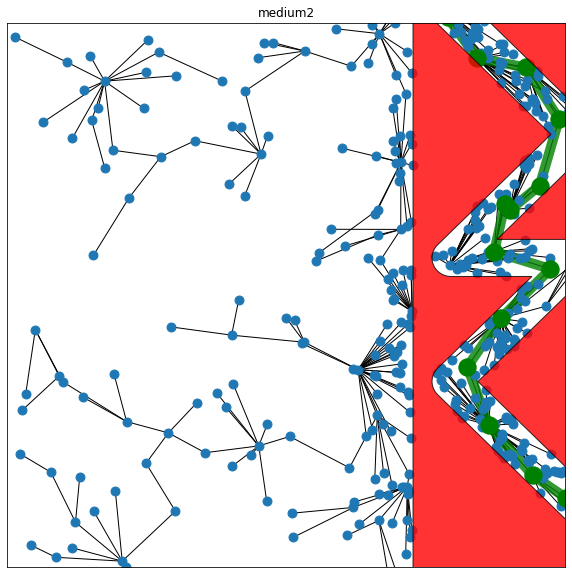

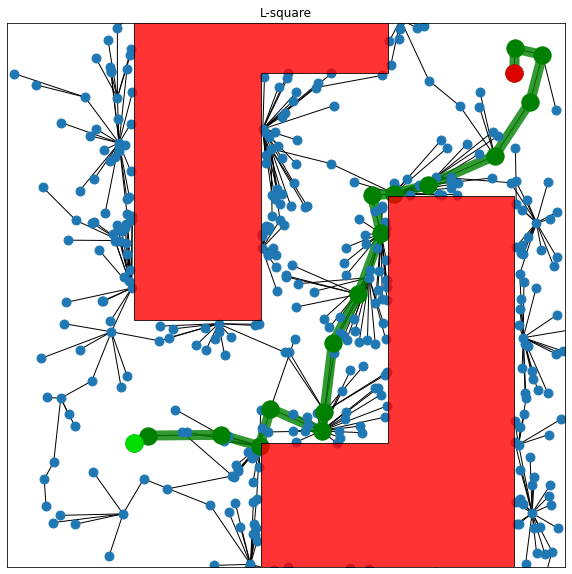

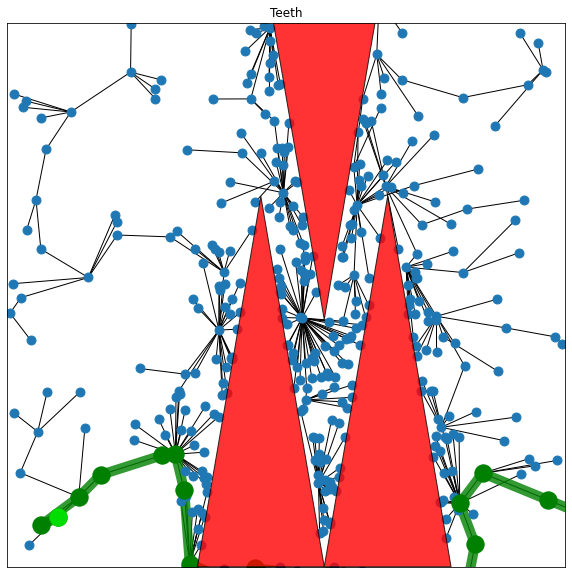

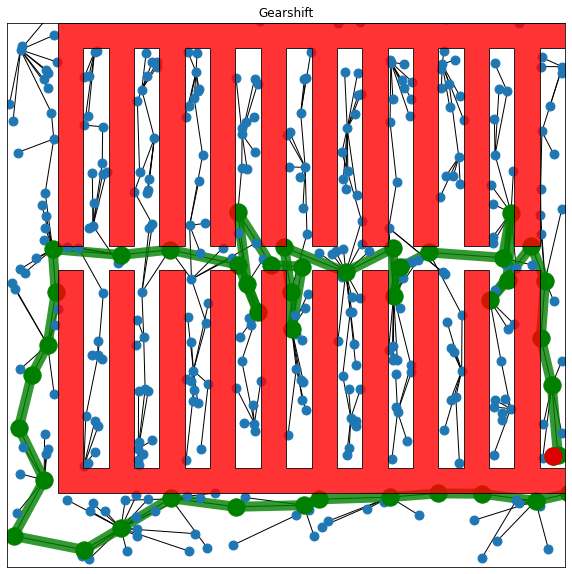

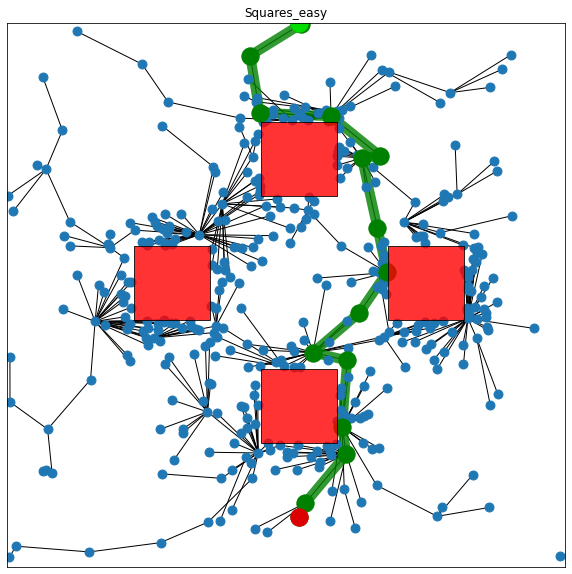

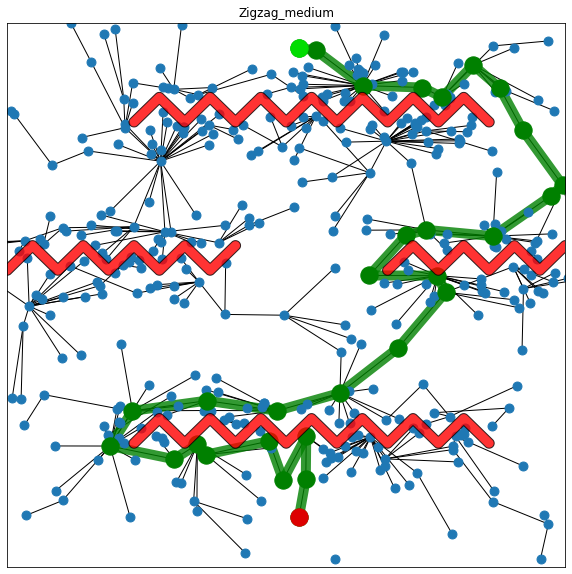

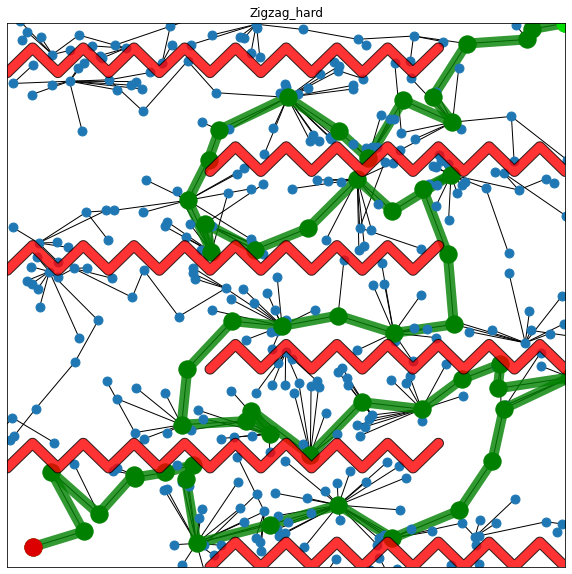

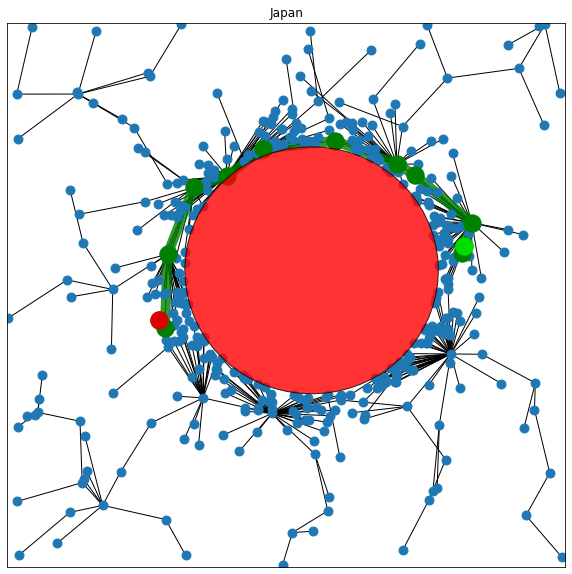

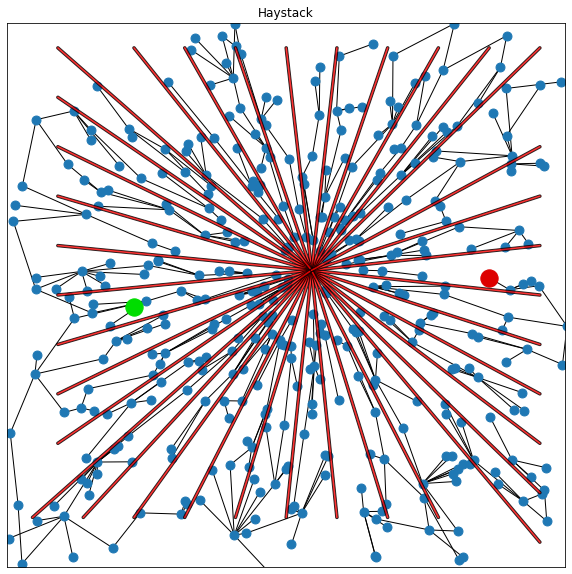

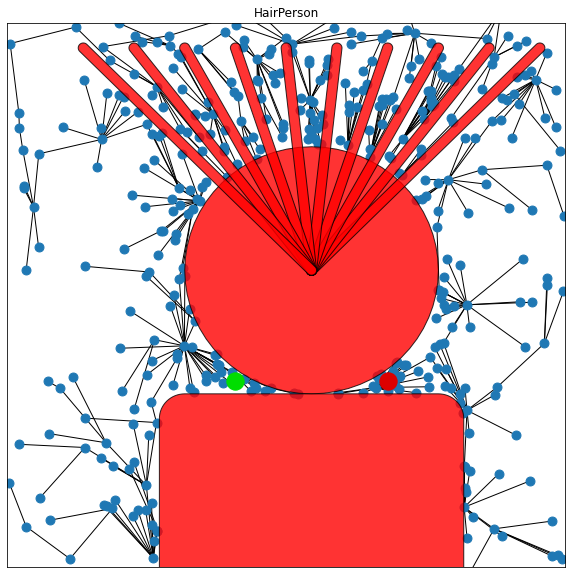

In [3]:
temp_list=IPTestSuite.benchList[5:]

config = {}
config['radius'] = 3.0
config['numNodesBasic'] = 400
config['numNodesGauss'] = 300
config['simple'] = True

for benchmark in temp_list:
    try:
        print ("Planning: ", benchmark.name)
        collChecker = benchmark.collisionChecker
        gauss = BasicGaussianPRM(collChecker)
        solution = gauss.planPath(benchmark.startList[0],benchmark.goalList[0], config)
        print(solution, len(solution))
        print(len(gauss.graph.nodes()))
    except Exception as e:
        solution = []
        print ("Failed", e)

    # draw the planning
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1,1,1)
    limits=collChecker.getEnvironmentLimits()
    ax.set_xlim(limits[0])
    ax.set_ylim(limits[1])
    ax.set_title(benchmark.name)
    basicPRMVisualize(gauss.graph, collChecker,solution,nodeSize=80,ax=ax)